In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from dataset import parse_data

In [2]:
def plot_data(X, Y, title=''):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:, 0], X[:,1], c=Y)
    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    plt.show()

# Linearly Separable Data

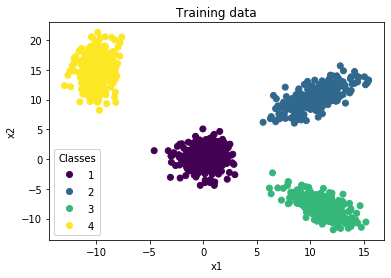

In [194]:
# Training Data Visualization
root_dir = os.path.join('dataset', 'linearlySeparable')
X_train, Y_train = parse_data(root_dir, 'train')
X_val, Y_val = parse_data(root_dir, 'val')
X_test, Y_test = parse_data(root_dir, 'test')
plot_data(X_train, Y_train, 'Training data')

In [190]:
# Count the number of training examples belonging to each class
class_count = np.bincount(Y_train)

In [191]:
# Compute estimator for mean
mean = np.zeros((4, 2))

for i in range(len(X_train)):
    if(Y_train[i] == 1):
        mean[0] = mean[0] + X_train[i,:]
    elif(Y_train[i] == 2):
        mean[1] = mean[1] + X_train[i,:]
    elif(Y_train[i] == 3):
        mean[2] = mean[2] + X_train[i,:]
    else:
        mean[3] = mean[3] + X_train[i,:]
        
for i in range(len(mean)):
    mean[i] = mean[i] / class_count[i+1]

In [192]:
# Compute estimator for variance
std_dev = np.zeros((4, 2, 2))

for i in range(len(X_train)):
    if(Y_train[i] == 1):
        std_dev[0] = std_dev[0] + ((X_train[i, :] - mean[0]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[0]).reshape(2, 1)))
    elif(Y_train[i] == 2):
        std_dev[1] = std_dev[1] + ((X_train[i, :] - mean[1]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[1]).reshape(2, 1)))
    elif(Y_train[i] == 3):
        std_dev[2] = std_dev[2] + ((X_train[i, :] - mean[2]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[2]).reshape(2, 1)))
    else:
        std_dev[3] = std_dev[3] + ((X_train[i, :] - mean[3]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[3]).reshape(2, 1)))
        
for i in range(len(std_dev)):
    std_dev[i] = std_dev[i] / class_count[i+1]

In [179]:
# Function to classify the given test example
discriminator = np.zeros(4)
def classify_example(example):
    for i in range(4):
        discriminator[i] = np.log(class_count[i+1] / len(X_train)) - (0.5 * np.linalg.det(std_dev[i])) - (0.5 * np.matmul(np.transpose((example - mean[i]).reshape(2, 1)), np.matmul(np.linalg.inv(std_dev[i]), (example - mean[i]).reshape(2, 1))))
        

    return np.argmax(discriminator) + 1

In [180]:
# Classifying examples from test set
pred_y = np.zeros(len(Y_test))

for i in range(len(X_test)):
    pred_y[i] = classify_example(X_test[i, :])

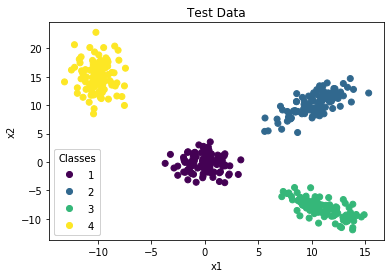

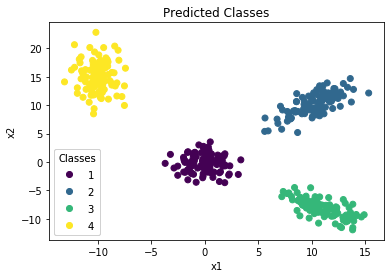

In [199]:
# Visualizing the Test Data and the Predictions made by Bayes Classifier
plot_data(X_test, Y_test, 'Test Data')
plot_data(X_test, pred_y, 'Predicted Classes')

# Overlapping Data

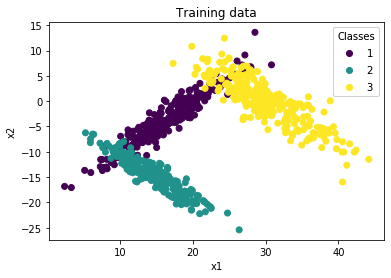

In [200]:
# Training Data Visualization
root_dir = os.path.join('dataset', 'overlapping')
X_train, Y_train = parse_data(root_dir, 'train')
X_val, Y_val = parse_data(root_dir, 'val')
X_test, Y_test = parse_data(root_dir, 'test')
plot_data(X_train, Y_train, 'Training data')

In [201]:
# Count the number of training examples belonging to each class
class_count = np.bincount(Y_train)

In [202]:
# Compute estimator for mean
mean = np.zeros((3, 2))

for i in range(len(X_train)):
    if(Y_train[i] == 1):
        mean[0] = mean[0] + X_train[i,:]
    elif(Y_train[i] == 2):
        mean[1] = mean[1] + X_train[i,:]
    else:
        mean[2] = mean[2] + X_train[i,:]
        
for i in range(len(mean)):
    mean[i] = mean[i] / class_count[i+1]

In [203]:
# Compute estimator for variance
std_dev = np.zeros((3, 2, 2))

for i in range(len(X_train)):
    if(Y_train[i] == 1):
        std_dev[0] = std_dev[0] + ((X_train[i, :] - mean[0]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[0]).reshape(2, 1)))
    elif(Y_train[i] == 2):
        std_dev[1] = std_dev[1] + ((X_train[i, :] - mean[1]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[1]).reshape(2, 1)))
    else:
        std_dev[2] = std_dev[2] + ((X_train[i, :] - mean[2]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[2]).reshape(2, 1)))
        
for i in range(len(std_dev)):
    std_dev[i] = std_dev[i] / class_count[i+1]

In [204]:
# Function to classify the given test example
discriminator = np.zeros(3)
def classify_example(example):
    for i in range(3):
        discriminator[i] = np.log(class_count[i+1] / len(X_train)) - (0.5 * np.linalg.det(std_dev[i])) - (0.5 * np.matmul(np.transpose((example - mean[i]).reshape(2, 1)), np.matmul(np.linalg.inv(std_dev[i]), (example - mean[i]).reshape(2, 1))))
        

    return np.argmax(discriminator) + 1

In [205]:
# Classifying examples from test set
pred_y = np.zeros(len(Y_test))

for i in range(len(X_test)):
    pred_y[i] = classify_example(X_test[i, :])

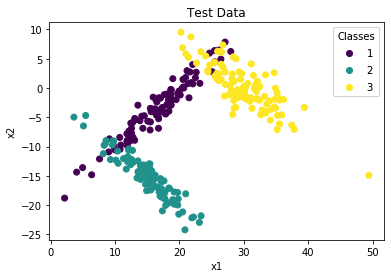

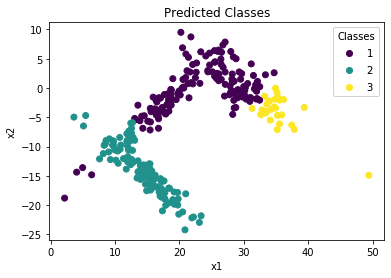

In [206]:
# Visualizing the Test Data and the Predictions made by Bayes Classifier
plot_data(X_test, Y_test, 'Test Data')
plot_data(X_test, pred_y, 'Predicted Classes')

# Non Linearly Separable Data

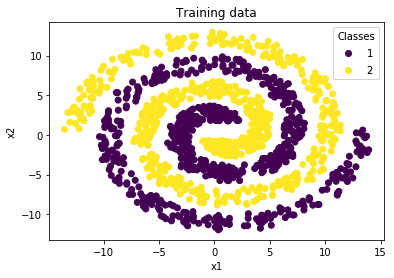

In [208]:
# Training Data Visualization
root_dir = os.path.join('dataset', 'nonLinearlySeparable')
X_train, Y_train = parse_data(root_dir, 'train')
X_val, Y_val = parse_data(root_dir, 'val')
X_test, Y_test = parse_data(root_dir, 'test')
plot_data(X_train, Y_train, 'Training data')

In [209]:
# Count the number of training examples belonging to each class
class_count = np.bincount(Y_train)

In [211]:
# Compute estimator for mean
mean = np.zeros((2, 2))

for i in range(len(X_train)):
    if(Y_train[i] == 1):
        mean[0] = mean[0] + X_train[i,:]
    else:
        mean[1] = mean[1] + X_train[i,:]
        
for i in range(len(mean)):
    mean[i] = mean[i] / class_count[i+1]

In [212]:
# Compute estimator for variance
std_dev = np.zeros((2, 2, 2))

for i in range(len(X_train)):
    if(Y_train[i] == 1):
        std_dev[0] = std_dev[0] + ((X_train[i, :] - mean[0]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[0]).reshape(2, 1)))
    else:
        std_dev[1] = std_dev[1] + ((X_train[i, :] - mean[1]).reshape(2, 1) * np.transpose((X_train[i, :] - mean[1]).reshape(2, 1)))

for i in range(len(std_dev)):
    std_dev[i] = std_dev[i] / class_count[i+1]

In [213]:
# Function to classify the given test example
discriminator = np.zeros(2)
def classify_example(example):
    for i in range(2):
        discriminator[i] = np.log(class_count[i+1] / len(X_train)) - (0.5 * np.linalg.det(std_dev[i])) - (0.5 * np.matmul(np.transpose((example - mean[i]).reshape(2, 1)), np.matmul(np.linalg.inv(std_dev[i]), (example - mean[i]).reshape(2, 1))))
        

    return np.argmax(discriminator) + 1

In [214]:
# Classifying examples from test set
pred_y = np.zeros(len(Y_test))

for i in range(len(X_test)):
    pred_y[i] = classify_example(X_test[i, :])

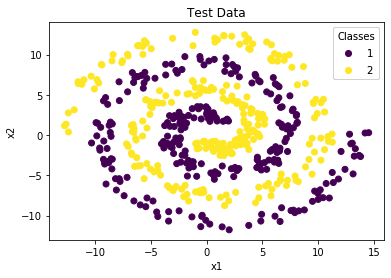

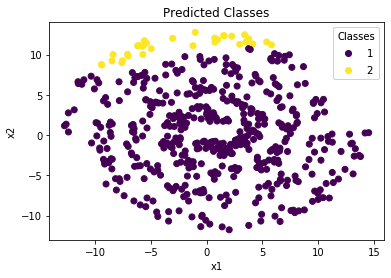

In [215]:
# Visualizing the Test Data and the Predictions made by Bayes Classifier
plot_data(X_test, Y_test, 'Test Data')
plot_data(X_test, pred_y, 'Predicted Classes')